# Analysing 416-float signature

In this notebook we'll analyse:

- The distribution of each component of 416-float signature
- The effects of normalization on classification

### Importing libraries

In [1]:
import utils.functions as utils
import sklearn
import json
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from random import randint
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
from IPython.display import HTML

In [2]:
train_path = 'json/trainList_416_ClusterCentroid_400max_vote_hard.json'
train_path = 'json/trainList_416_ClusterCentroid_400max.json'
test_path = 'json/testList_416_100perF100perC.json'

### Loading datasets

In [3]:
try:
    f_train = open(train_path,'r')
    f_test = open(test_path,'r')
    json_train = json.load(f_train)
    json_test = json.load(f_test)
finally:
    f_train.close()
    f_test.close()

# Classification with full subsampled dataset
***

In [176]:
x_train,y_train = utils.parse_data(json_train)
x_test,y_test = utils.parse_data(json_test)

## How is each component distributed?

### Before normalization

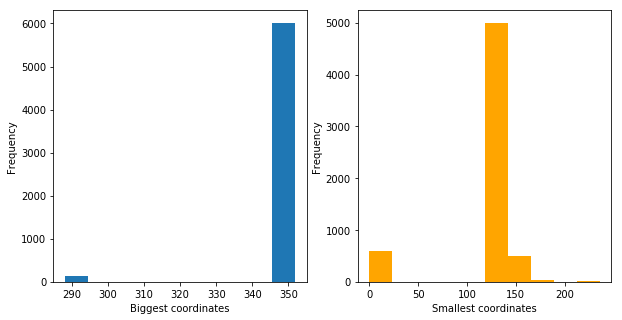

In [36]:
argmax  = np.argmax(x_test, axis = 1)
argmin  = np.argmin(x_test, axis = 1)

fig, [ax1,ax2] = plt.subplots(nrows = 1, ncols=2, figsize = (10,5))

ax1.hist(argmax)
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Biggest dimension')
ax2.hist(argmin, color = 'orange')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Smallest dimension')
plt.show()

C:\Users\fva3\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


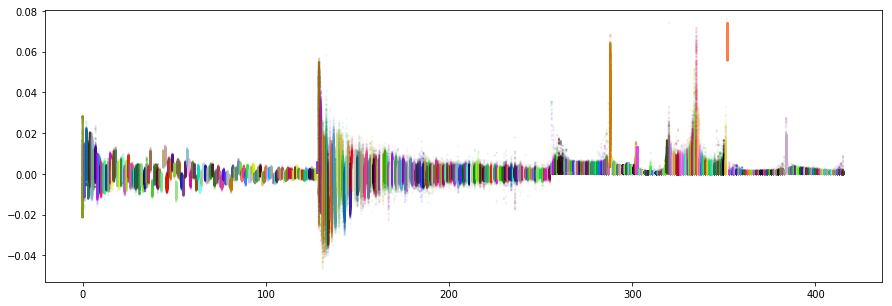

In [14]:
transposed = np.transpose(x_test)
n_dims = transposed.shape[1]
fig, ax = plt.subplots(figsize = (15,5))
for i in range(transposed.shape[0]):
    c = np.tile(np.random.rand(1,3),[n_dims,1])
    ax.scatter([i for _ in range(n_dims)],transposed[i],s = 2, c = c, alpha = 0.05)
fig.show()

### After normalization

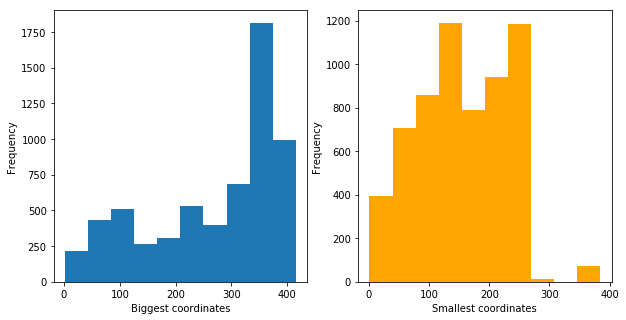

In [37]:
norma = utils.Normalizer(x_train)
x_test = norma.normalize(x_test)

argmax  = np.argmax(x_test, axis = 1)
argmin  = np.argmin(x_test, axis = 1)

fig, [ax1,ax2] = plt.subplots(nrows = 1, ncols=2, figsize = (10,5))

ax1.hist(argmax)
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Biggest coordinates')
ax2.hist(argmin, color = 'orange')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Smallest coordinates')
plt.show()

C:\Users\fva3\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


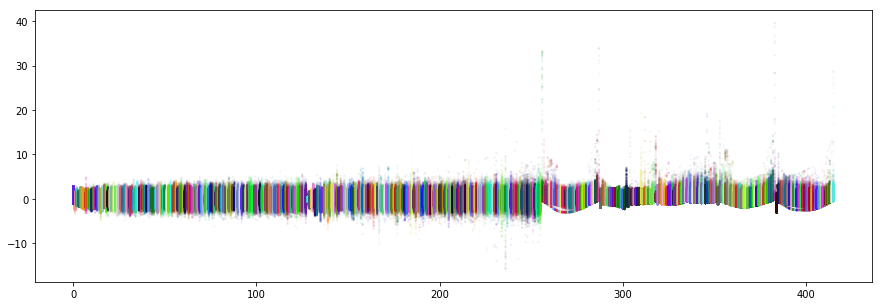

In [15]:
transposed = np.transpose(x_test)
n_dims = transposed.shape[1]
fig, ax = plt.subplots(figsize = (15,5))
for i in range(transposed.shape[0]):
    c = np.tile(np.random.rand(1,3),[n_dims,1])
    ax.scatter([i for _ in range(n_dims)],transposed[i],s = 2, c = c, alpha = 0.05)
fig.show()

## Nearest Neighbors Classifier Performance comparison

### Before normalization

In [177]:
x_train,y_train = utils.parse_data(json_train)
x_test,y_test = utils.parse_data(json_test)

C:\Users\fva3\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


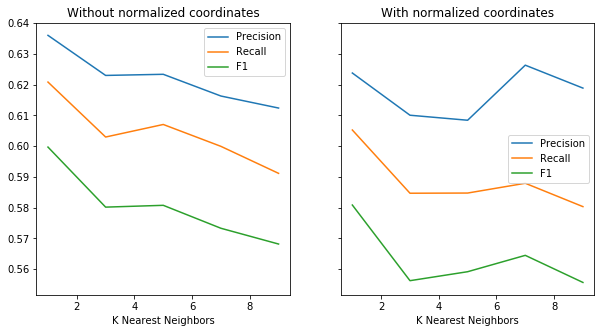

In [178]:
fig, [ax1,ax2] = plt.subplots(nrows = 1, ncols=2, sharex=True, sharey = True, figsize = (10,5))
for use_normalization in [False,True]:
    ks = []
    precisions = []
    recalls = []
    f1s = []
    ax = ax2 if use_normalization else ax1
    ax.set_title('Without normalized coordinates')
    if use_normalization:
        norma = utils.Normalizer(x_train)
        x_train = norma.normalize(x_train)
        x_test = norma.normalize(x_test)
        ax.set_title('With normalized coordinates')
    for k in range(1,10,2):
        neigh = KNeighborsClassifier(n_neighbors = k, n_jobs = 14)
        neigh.fit(x_train,y_train)
        y_pred = neigh.predict(x_test)

        #Calculating scores
        precision, recall, f1 = utils.precision_recall_f1(y_test,y_pred)

        ks.append(k)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
    ax.plot(ks,precisions, label = 'Precision')
    ax.plot(ks,recalls, label = 'Recall')
    ax.plot(ks,f1s, label = 'F1')
    ax.legend()
    ax.set_xlabel('K Nearest Neighbors')
fig.show()

# Classification with TP45 dataset
***

## Nearest Neighbors Classifier Performance comparison

In [4]:
f = open('tp45.txt','r')
labels_to_keep = f.readlines()
for i in range(len(labels_to_keep)):
    labels_to_keep[i] = labels_to_keep[i][:-1]

In [161]:
x_train,y_train = utils.parse_data_filter(json_train, labels_to_keep)
x_test,y_test = utils.parse_data_filter(json_test, labels_to_keep)

WARNING lobed-seals  has 0
WARNING coaxial-gear-reducers  has 0
WARNING roller-torque-limiters  has 0
WARNING ankles-anchor-rod-expansion-bolt  has 0
WARNING wingnuts  has 0
WARNING square-nuts  has 0
WARNING cap-nuts  has 0


C:\Users\fva3\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


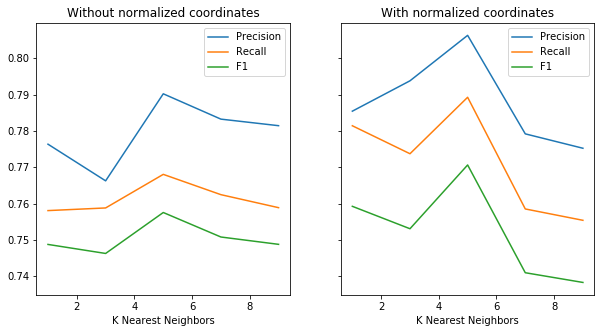

In [166]:
fig, [ax1,ax2] = plt.subplots(nrows = 1, ncols=2, sharex=True, sharey = True, figsize = (10,5))
for use_normalization in [False,True]:
    ks = []
    precisions = []
    recalls = []
    f1s = []
    ax = ax2 if use_normalization else ax1
    ax.set_title('Without normalized coordinates')
    if use_normalization:
        norma = utils.Normalizer(x_train)
        x_train = norma.normalize(x_train)
        x_test = norma.normalize(x_test)
        ax.set_title('With normalized coordinates')
    for k in range(1,10,2):
        neigh = KNeighborsClassifier(n_neighbors = k, n_jobs = 14)
        neigh.fit(x_train,y_train)
        y_pred = neigh.predict(x_test)

        #Calculating scores
        precision, recall, f1 = utils.precision_recall_f1(y_test,y_pred)

        ks.append(k)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
    ax.plot(ks,precisions, label = 'Precision')
    ax.plot(ks,recalls, label = 'Recall')
    ax.plot(ks,f1s, label = 'F1')
    ax.legend()
    ax.set_xlabel('K Nearest Neighbors')
fig.show()

### SMOTETomek

In [7]:
x_train,y_train = utils.parse_data_filter(json_train, labels_to_keep)
x_test,y_test = utils.parse_data_filter(json_test, labels_to_keep)

WARNING lobed-seals  has 0
WARNING coaxial-gear-reducers  has 0
WARNING roller-torque-limiters  has 0
WARNING ankles-anchor-rod-expansion-bolt  has 0
WARNING wingnuts  has 0
WARNING square-nuts  has 0
WARNING cap-nuts  has 0


In [15]:
from imblearn.combine import SMOTETomek

minorities = utils.get_classes_under_threshold(y_train, 400)
desiredSamples = np.array([400 for obj in minorities])

smote = SMOTETomek(ratio = dict(zip(minorities,desiredSamples)), k = 5)

x_smote,y_smote = smote.fit_sample(x_train,y_train)

neigh = KNeighborsClassifier(n_neighbors =  5, n_jobs = 7)
neigh.fit(x_train,y_train)
y_pred = neigh.predict(x_test)

#Calculating scores
precision, recall, f1 = utils.precision_recall_f1(y_test,y_pred)

print('Before: \n')
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

neigh = KNeighborsClassifier(n_neighbors = 1, n_jobs = 7)
neigh.fit(x_smote,y_smote)
y_pred = neigh.predict(x_test)

#Calculating scores
precision, recall, f1 = utils.precision_recall_f1(y_test,y_pred)

print('After: \n')
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

C:\Users\fva3\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\imblearn\utils\deprecation.py:50: DeprecationWarning: 'k' is deprecated from 0.2 and will be removed in 0.4. Use 'k_neighbors' instead.
  category=DeprecationWarning)
C:\Users\fva3\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\imblearn\utils\deprecation.py:50: DeprecationWarning: 'm' is deprecated from 0.2 and will be removed in 0.4. Use 'm_neighbors' instead.
  category=DeprecationWarning)


Before: 

Precision:  0.7902245566761753
Recall:  0.7680447533435937
F1:  0.7575444884096436
After: 

Precision:  0.7756224232652744
Recall:  0.7595440851150039
F1:  0.7500840606904716


# Classification with TP20 dataset
***

## Nearest Neighbors Classifier Performance comparison

In [27]:
f = open('tp20.txt','r')
labels_to_keep = f.readlines()
for i in range(len(labels_to_keep)):
    labels_to_keep[i] = labels_to_keep[i][:-1]

In [28]:
x_train,y_train = utils.parse_data_filter(json_train, labels_to_keep)
x_test,y_test = utils.parse_data_filter(json_test, labels_to_keep)

C:\Users\FVA3\AppData\Local\Continuum\anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


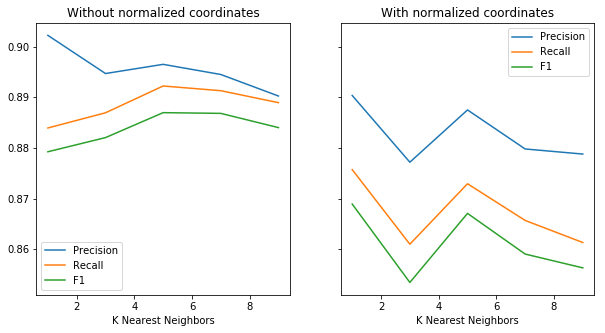

In [16]:
fig, [ax1,ax2] = plt.subplots(nrows = 1, ncols=2, sharex=True, sharey = True, figsize = (10,5))
for use_normalization in [False,True]:
    ks = []
    precisions = []
    recalls = []
    f1s = []
    ax = ax2 if use_normalization else ax1
    ax.set_title('Without normalized coordinates')
    if use_normalization:
        norma = utils.Normalizer(x_train)
        x_train = norma.normalize(x_train)
        x_test = norma.normalize(x_test)
        ax.set_title('With normalized coordinates')
    for k in range(1,10,2):
        neigh = KNeighborsClassifier(n_neighbors = k, n_jobs = 14)
        neigh.fit(x_train,y_train)
        y_pred = neigh.predict(x_test)

        #Calculating scores
        precision, recall, f1 = utils.precision_recall_f1(y_test,y_pred)

        ks.append(k)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
    ax.plot(ks,precisions, label = 'Precision')
    ax.plot(ks,recalls, label = 'Recall')
    ax.plot(ks,f1s, label = 'F1')
    ax.legend()
    ax.set_xlabel('K Nearest Neighbors')
fig.show()

In [15]:
neigh = KNeighborsClassifier(n_neighbors = 1, n_jobs = 14)
neigh.fit(x_train,y_train)
y_pred = neigh.predict(x_test)

#Calculating scores
precision, recall, f1 = utils.precision_recall_f1(y_test,y_pred)
print(precision)
print(recall)
print(f1)

0.9022049000134837
0.8839285714285714
0.879238717345487


# Neural Network classifierb

Template based on https://github.com/MrGemy95/Tensorflow-Project-Template

In [5]:

class Data():
    
    def __init__(self, x_train, y_train, x_test, y_test, config):
        '''
        Inputs:
            x_train : np.array of shape (nb of train instances, features)
            y_train : np.array of shape (nb of train instances,) containing all labels
            x_test : np.array of shape (nb of test instances, features)
            y_test : np.array of shape (nb of test instances,) containing all labels
            config : dict with all hyperparameters and configurations
            
        '''
        self.label_encoder =  preprocessing.LabelBinarizer()
        self.label_encoder.fit(np.append(y_train,y_test,axis = 0))
        self.y_train = self.label_encoder.transform(y_train)
        self.y_test = self.label_encoder.transform(y_test)
        self.x_train = x_train
        self.x_test = x_test
        #shuffling train data
        self.x_train,self.y_train = self.shuffle_features_and_labels(self.x_train,self.y_train)
        
        self.unique_labels = np.unique(y_train)
        self.num_of_classes = self.unique_labels.shape[0]
        self.batch_size = config['batch_size']
        assert(self.batch_size > self.num_of_classes)
        self.batch_size -= self.batch_size%self.num_of_classes
        self.num_batch = self.x_train.shape[0]//self.batch_size
        
        self.x_train,self.y_train = self.shuffle_features_and_labels(self.x_train,self.y_train)
        self.labels_and_features_dic =  self.create_dic_with_labels_and_features(self.x_train,self.y_train)
        self.balanced_x_train, self.balanced_y_train = self.make_balanced_batches()
        #self.balanced_x_train, self.balanced_y_train = self.shuffle_features_and_labels(self.balanced_x_train,self.balanced_y_train)
        
        
    '''
    shuffles two arrays, keeping indexes correspondances
    '''    
    def shuffle_features_and_labels(self,features,labels):
            #shuffling data
            randomize = np.arange(features.shape[0])
            np.random.shuffle(randomize)
            features = features[randomize]
            labels = labels[randomize]
            return features, labels
    
    
    def create_dic_with_labels_and_features(self,features,labels):
        d = {}
        labels = self.label_encoder.inverse_transform(labels)
        for i in range(labels.shape[0]):
            label = labels[i]
            if label in d.keys():
                d[label] = np.append(np.expand_dims(features[i],axis = 0),d[label], axis = 0)
            else:
                d[label] = np.expand_dims(features[i],axis = 0)
        return d
        
    def make_balanced_batches(self):
        
       
        num_per_batch = int(self.batch_size/self.num_of_classes)
        balanced_x_train = []
        balanced_y_train = []
        for key in list(self.labels_and_features_dic.keys()):
            indexes = np.array([i%len(self.labels_and_features_dic[key]) for i in range(self.num_batch*num_per_batch)])
            selected = self.labels_and_features_dic[key][indexes]
            y_selected = np.array(self.label_encoder.transform([key for _ in range(selected.shape[0])]))
            for obj in range(selected.shape[0]):
                balanced_x_train.append(selected[obj])
                balanced_y_train.append(y_selected[obj])
        return np.array(balanced_x_train), np.array(balanced_y_train)     
    
    def next_batch(self):
        idx = np.random.choice(self.balanced_x_train.shape[0],self.batch_size)
        yield self.balanced_x_train[idx],self.balanced_y_train[idx]
        
        
    def array_name_at_level(self,labels,level):
        for i in range(labels.shape[0]):
            labels[i] = self.name_at_level(labels[i],level)
        return labels
    
    def name_at_level(self,string,level):
        '''
        receives a string with the entire label for a certain object
        and cuts the right half
        :param string: the label as a string
        :param level: desired level
        '''
        index = -len(string.split('/'))+level+3
        index = min(len(string.split('/')) + index, len(string.split('/'))+1)
        out = '/'.join(string.split('/')[:index])
        if out[-1] != '/':
            out += '/'
        return out   

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jun  3 13:52:23 2018

@author: felip
"""

class ClassifierNet():
    def __init__(self, feature_dim, classes_num, config):
        self.init_global_step()
        self.feature_dim = feature_dim
        self.classes_num = classes_num
        
        # init the global step
        self.init_global_step()
        # init the epoch counter
        self.init_cur_epoch()
        self.config = config
        self.learning_rate = config['learning_rate']
        #build graph
        self.build_network()
        #init saver
        self.init_saver()
        #create checkpoint directory if it doesn't exist
        self.checkpoint_dir = config['checkpoint_dir']
        if not os.path.exists(self.checkpoint_dir):
            os.makedirs(self.checkpoint_dir)
        
    def build_network(self):
        
        #tf.reset_default_graph()
        
    
        self.is_training = tf.placeholder(tf.bool)
        self.x = tf.placeholder(tf.float32, [None, self.feature_dim])
        self.y = tf.placeholder(tf.float32, [None, self.classes_num])
        self.class_weights  = tf.placeholder(tf.float32, [self.classes_num])
        
        self.dense = tf.layers.dense(inputs = self.x, units = 128, activation = tf.nn.relu,use_bias = True,name = 'dense1')
        self.dropout = tf.layers.dropout(inputs = self.dense, rate = 0.7, training = self.is_training)
        self.logits = tf.layers.dense(inputs = self.dropout, units = self.classes_num, name = 'logits')
        
        
        
        with tf.name_scope("loss"):
            self.loss =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = self.y, logits = self.logits)) 
            self.train_step = tf.train.AdamOptimizer(self.learning_rate).minimize(self.loss, global_step =  self.global_step_tensor)
            
            self.prediction = tf.argmax(self.logits,1)
            self.labels = tf.argmax(self.y,1)
            #accuracy
            correct_prediction = tf.equal(self.prediction,self.labels)
            self.accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
            
            
    def init_saver(self):
        tf.global_variables_initializer()
        self.saver = tf.train.Saver(max_to_keep=self.config['max_to_keep'])
    
    def init_global_step(self):
        # DON'T forget to add the global step tensor to the tensorflow trainer
        with tf.variable_scope('global_step'):
            self.global_step_tensor = tf.Variable(0, trainable=False, name='global_step')
    
    def init_cur_epoch(self):
        with tf.variable_scope('cur_epoch'):
            self.cur_epoch_tensor = tf.Variable(0, trainable=False, name='cur_epoch')
            self.increment_cur_epoch_tensor = tf.assign(self.cur_epoch_tensor, self.cur_epoch_tensor + 1)
            
    
    def save(self, sess):
        print("Saving model...")
        self.saver.save(sess, self.checkpoint_dir, self.global_step_tensor)
        print("Model saved")
    
    def load(self, sess):
        latest_checkpoint = tf.train.latest_checkpoint(self.checkpoint_dir)
        if latest_checkpoint:
            print("Loading model checkpoint {} ...\n".format(latest_checkpoint))
            tf.reset_default_graph()
            self.saver.restore(sess, latest_checkpoint)
#            weights = tf.get_default_graph().get_tensor_by_name(os.path.split(self.dense_4.name)[0] + '/kernel:0')
#            sess.run(tf.variables_initializer([weights]))
            print("Model loaded")
            
    def load_path(self, sess, path):
        print("Loading model checkpoint {} ...\n".format(path))
        self.saver.restore(sess, path)
        print("Model loaded")
    
    def dense(x, num_in, num_out, name, relu=True):
        """Create a fully connected layer."""
        with tf.variable_scope(name) as scope:

            # Create tf variables for the weights and biases
            weights = tf.get_variable('weights', shape=[num_in, num_out],
                                      trainable=True)
            biases = tf.get_variable('biases', [num_out], trainable=True)

            # Matrix multiply weights and inputs and add bias
            act = tf.nn.xw_plus_b(x, weights, biases, name=scope.name)

        if relu:
            # Apply ReLu non linearity
            relu = tf.nn.relu(act)
            return relu
        else:
            return act  

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jun  3 15:08:40 2018

@author: felip
"""      
class Trainer:
    
    def __init__(self, sess, model, data, config, logger):
        
        self.epochs = config['epochs']
        
        self.model = model
        self.data = data
        self.sess = sess
        self.logger = logger
        self.x_test = self.data.x_test
        self.y_test = self.data.y_test
        self.x_train = self.data.x_train
        self.y_train = self.data.y_train
        
        self.init = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
        self.sess.run(self.init)
        
    def train(self):
        self.max_validation_f1 = 0
        self.training_loss = []
        for i in range(self.epochs):
            self.train_epoch()
            self.sess.run(self.model.increment_cur_epoch_tensor)

        
    def train_epoch(self):
        
        losses = []
        precs = []
        accs = []
        recalls = []
        f1s = []
        loop = tqdm(range(self.data.num_batch))
        for _ in loop:
            loss, acc, prec,recall,f1= self.train_step()
            losses.append(loss)
            accs.append(acc)
            precs.append(prec)
            recalls.append(recall)
            f1s.append(f1)
            
        self.training_loss.append(np.mean(losses))
        cur_it = self.model.global_step_tensor.eval(self.sess)

        print("Epoch {0}, training loss is {1}, training accuracy is {2}, precision is {3}, recall is {4}, f1 score is {5}".format(self.model.cur_epoch_tensor.eval(self.sess),np.mean(losses),np.mean(accs),np.mean(precs),np.mean(recalls),np.mean(f1s)))
        summaries_dict = {
                'loss':np.mean(losses),
                'accuracy': np.mean(accs),
                'precision': np.mean(precs),
                'recall': np.mean(recalls),
                'f1':np.mean(f1s)
        }
        
        self.logger.summarize(cur_it,summaries_dict = summaries_dict)
        
        
        #testing
        feed_dict = {self.model.x: self.x_test, self.model.y: self.y_test, self.model.is_training : False}                
        loss, acc,labels,preds = self.sess.run([self.model.loss, self.model.accuracy,self.model.labels,self.model.prediction], feed_dict = feed_dict)
        prec,recall,f1 = self.precision_recall_f1(labels,preds)
        
        print("Testing loss is {0}, testing accuracy is {1}, precision is {2}, recall is {3}, f1 score is {4}".format(loss,acc,prec,recall,f1),end = '\n')
        summaries_dict = {
                'loss':loss,
                'accuracy': acc,
                'precision': prec,
                'recall': recall,
                'f1':f1}
        self.logger.summarize(cur_it,summaries_dict = summaries_dict,summarizer="test")
        #saving
        if f1 > self.max_validation_f1:
            self.max_validation_f1 = f1
            self.model.save(self.sess)
            
    def train_step(self):
        x,y = next(self.data.next_batch())
        feed_dict = {self.model.x: x, self.model.y: y,  self.model.is_training : True}                
        _ , loss, acc, labels, preds = self.sess.run([self.model.train_step,self.model.loss,self.model.accuracy,self.model.labels,self.model.prediction], feed_dict = feed_dict)
        prec,recall,f1 = self.precision_recall_f1(labels,preds)
        return loss, acc, prec, recall, f1
    
    def precision_recall_f1(self,labels,predictions):
        uniques = np.unique(labels)
        #number of classes
        n = uniques.shape[0]
        precision = []
        recall = []
        f1 = []
        for k in range(n):
            cur_label = uniques[k]
            tp = ((labels == cur_label) & (predictions == cur_label)).sum()
            fp = ((labels != cur_label) & (predictions == cur_label)).sum()
            fn = ((labels == cur_label) & (predictions != cur_label)).sum()
            if tp + fp != 0:
                recall.append(tp/(tp + fn))
                if tp == 0:
                    precision.append(0)
                    f1.append(0)
                else:
                    precision.append(tp/(tp + fp))
                    f1.append(2*precision[-1]*recall[-1]/(precision[-1] + recall[-1]))
        precision = np.array(precision)
        recall = np.array(recall)
        f1 = np.array(f1)
        return np.mean(precision), np.mean(recall), np.mean(f1)
    
    
    def plot_training_loss(self):
        plt.plot(self.training_loss)
        
    def train_from_checkpoint(self,checkpoint,config = None):
        if config:
            self.config = config

In [8]:


"""
Based on 
https://github.com/MrGemy95/Tensorflow-Project-Template/blob/master/utils/logger.py
"""
class Logger:
    def __init__(self, sess,config):
        self.sess = sess
        self.config = config
        self.summary_placeholders = {}
        self.summary_ops = {}
        self.train_summary_writer = tf.summary.FileWriter(os.path.join(self.config["summary_dir"], "train"),
                                                          self.sess.graph)
        self.test_summary_writer = tf.summary.FileWriter(os.path.join(self.config["summary_dir"], "test"))

    # it can summarize scalars and images.
    def summarize(self, step, summarizer="train", scope="", summaries_dict=None):
        """
        :param step: the step of the summary
        :param summarizer: use the train summary writer or the test one
        :param scope: variable scope
        :param summaries_dict: the dict of the summaries values (tag,value)
        :return:
        """
        summary_writer = self.train_summary_writer if summarizer == "train" else self.test_summary_writer
        with tf.variable_scope(scope):
            if summaries_dict is not None:
                summary_list = []
                for tag, value in summaries_dict.items():
                    if tag not in self.summary_ops:
                        if len(value.shape) <= 1:
                            self.summary_placeholders[tag] = tf.placeholder('float32', value.shape, name=tag)
                        else:
                            self.summary_placeholders[tag] = tf.placeholder('float32', [None] + list(value.shape[1:]), name=tag)
                        if len(value.shape) <= 1:
                            self.summary_ops[tag] = tf.summary.scalar(tag, self.summary_placeholders[tag])
                        else:
                            self.summary_ops[tag] = tf.summary.image(tag, self.summary_placeholders[tag])

                    summary_list.append(self.sess.run(self.summary_ops[tag], {self.summary_placeholders[tag]: value}))

                for summary in summary_list:
                    summary_writer.add_summary(summary, step)
                summary_writer.flush()

In [9]:
config = {
  "epochs": 200,
  "learning_rate": 0.0001,
  "batch_size": 100,
  "max_to_keep":10,
  "checkpoint_dir": "e:/tmp/Demo/checkpoints/",
  "summary_dir": "e:/tmp/Demo/summary/"
}

# 
#  "obj_per_class_per_batch": 40,

In [ ]:
try:
    sess.close()
    tf.reset_default_graph()
except:
    pass

import numpy as np
import json
from sklearn import preprocessing
import matplotlib.pyplot as plt
import math
import time
import warnings
from collections import Counter
import tensorflow as tf
import os
from math import sqrt

x_train,y_train = utils.parse_data_filter(json_train, labels_to_keep)
x_test,y_test = utils.parse_data_filter(json_test, labels_to_keep)

norma = utils.Normalizer(x_train)
x_train = norma.normalize(x_train)
x_test = norma.normalize(x_test)
        
sess = tf.Session()
data = Data(x_train,y_train,x_test,y_test, config)

feature_dim = x_train[0].shape[0]
num_classes = np.unique(np.append(y_train,y_test,axis = 0)).shape[0]


model = ClassifierNet(feature_dim,num_classes,config)

#logger
logger = Logger(sess,config)
#trainer
trainer = Trainer(sess, model, data, config, logger)
#load model if exists
#model.load(sess)
#train
try:
    trainer.train()
except:
    pass

In [12]:
feed_dict = {model.x: trainer.x_test, trainer.model.y: trainer.y_test, model.is_training : False}                
loss, acc,labels,preds = trainer.sess.run([model.loss, model.accuracy,model.labels,model.prediction], feed_dict = feed_dict)

## Confusion Matrix

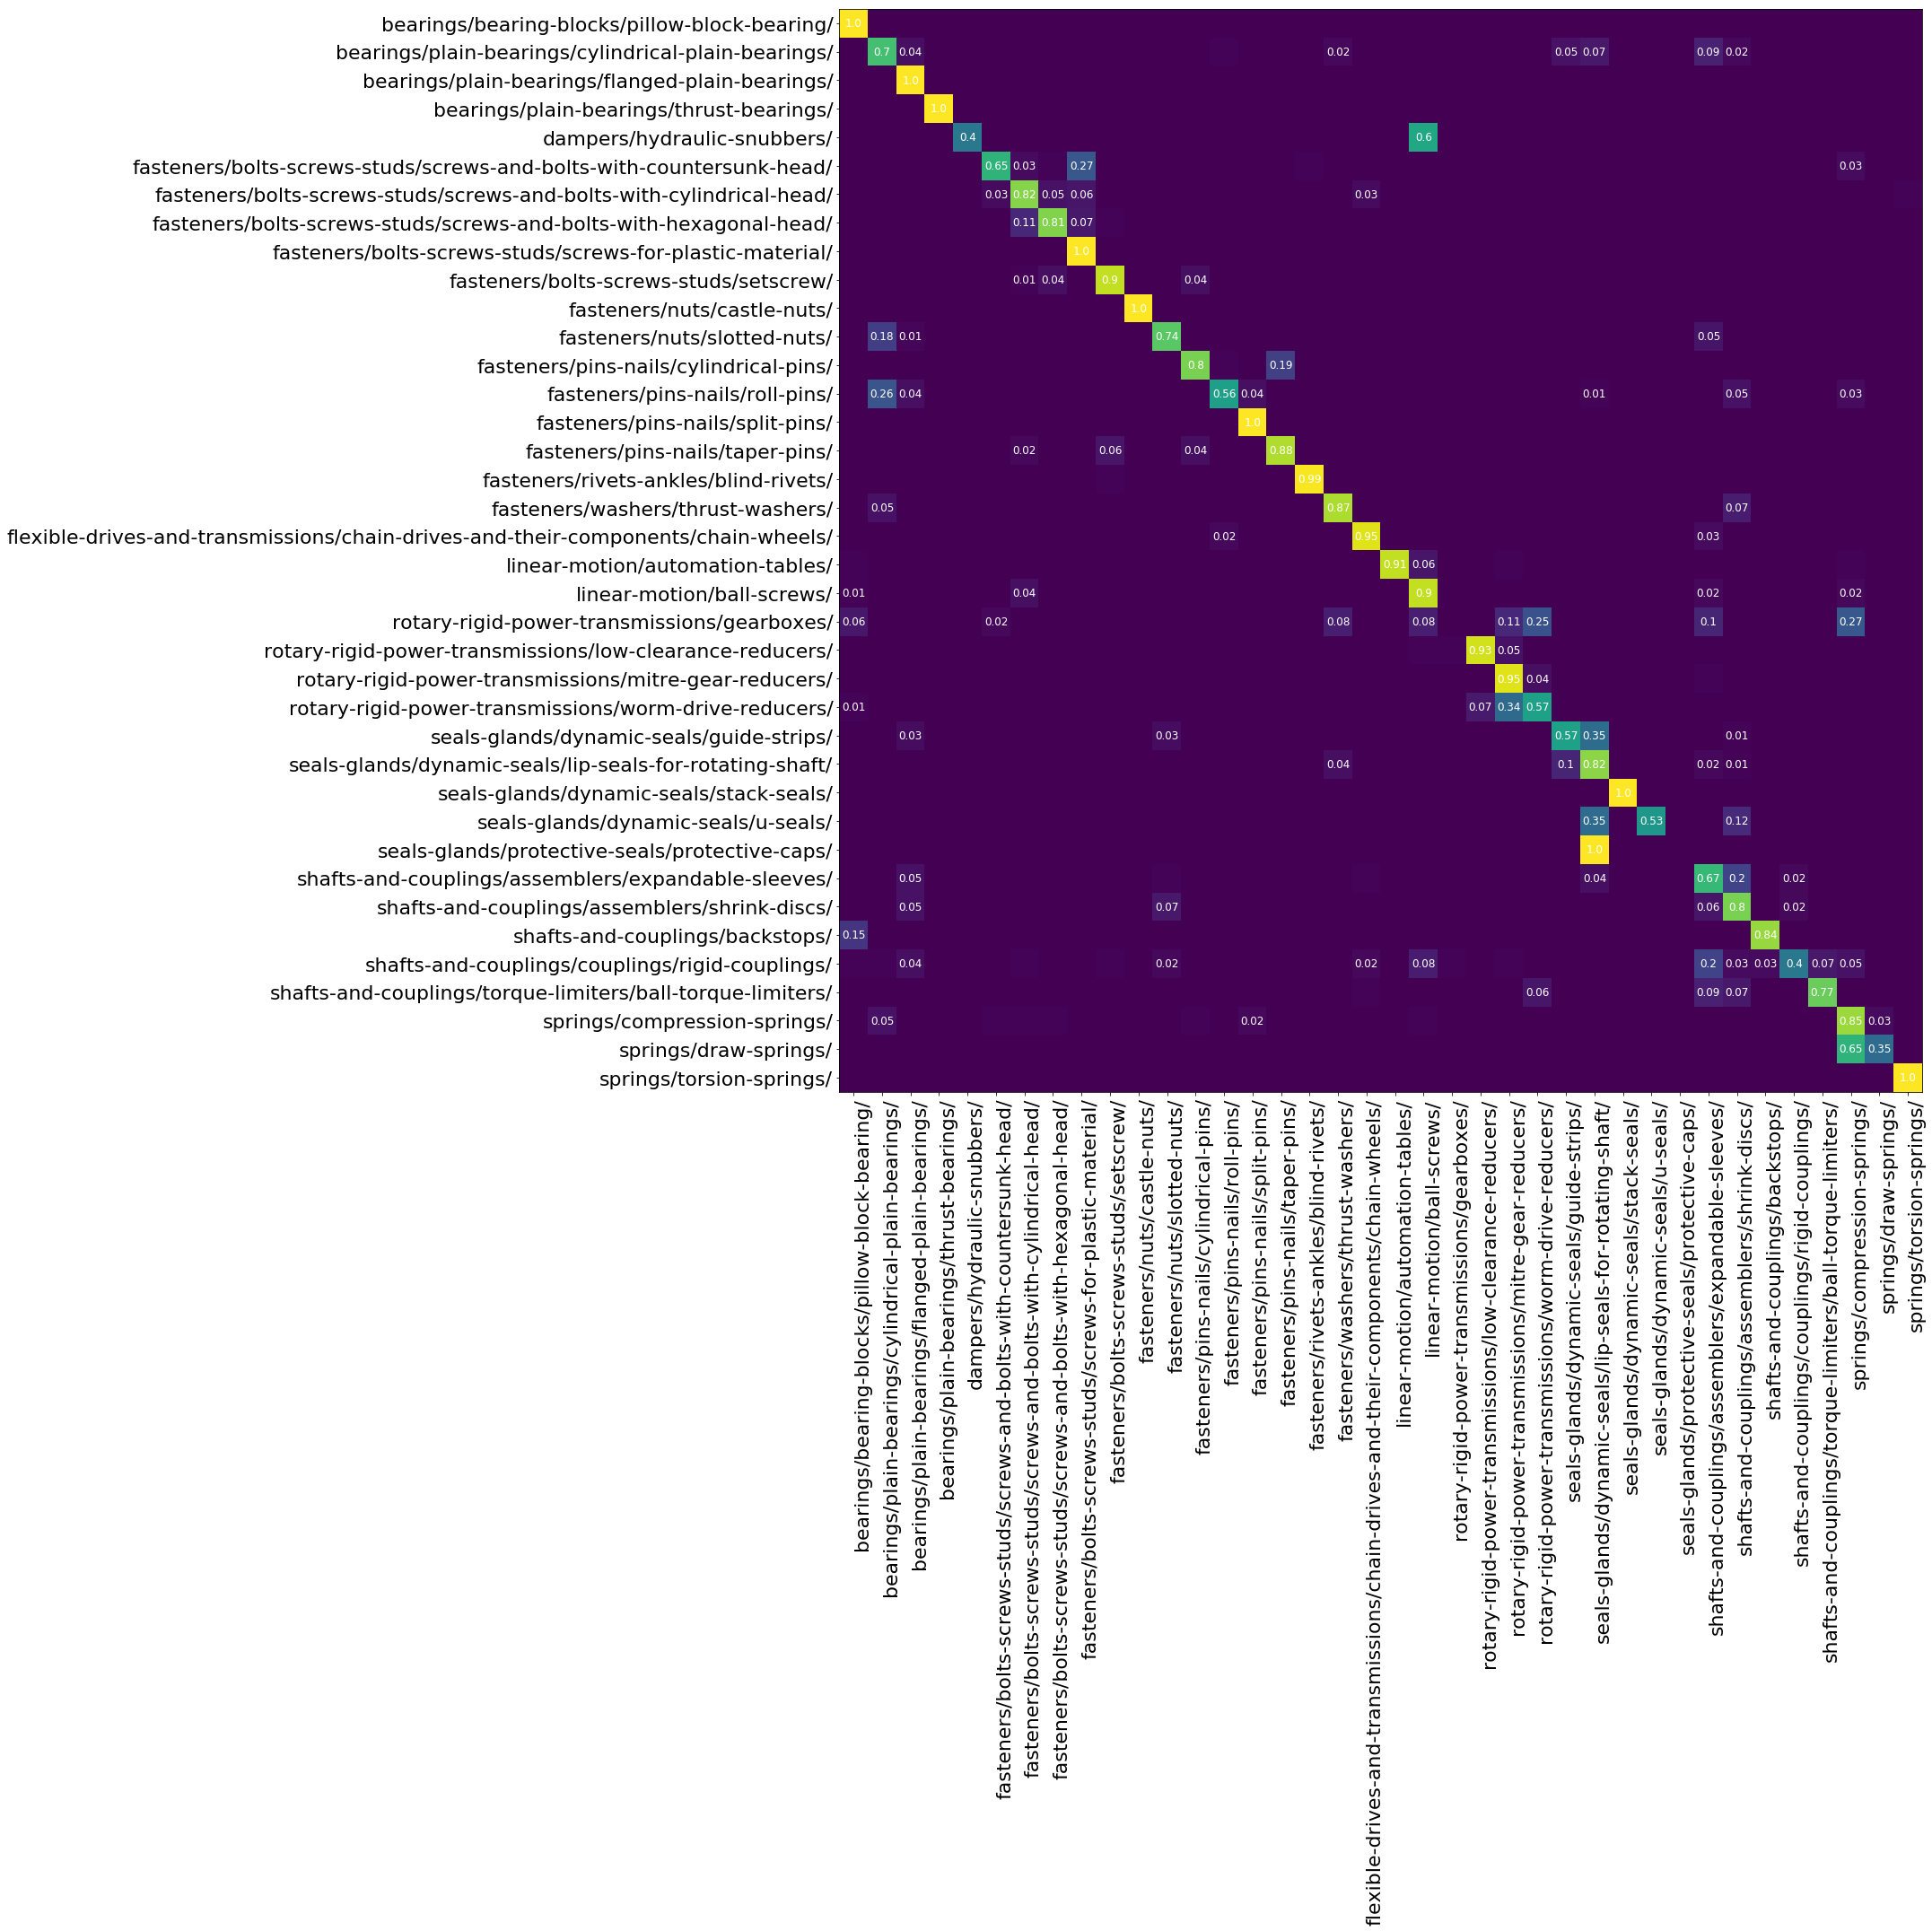

array([[1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.7 , 0.04, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.05, 0.  , ..., 0.85, 0.03, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.65, 0.35, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ]])

In [27]:
import sklearn
from sklearn.metrics import confusion_matrix

def plot_cnf_matrix(y_true,y_pred, class_labels):
    unique_labels = np.unique(y_true)
    cnf_matrix = sklearn.metrics.confusion_matrix(y_true, y_pred, labels = unique_labels)

    to_divide=np.tile(np.expand_dims(cnf_matrix.sum(axis=1),axis=-1),[1,cnf_matrix.shape[1]])
    normalized=cnf_matrix/to_divide

    fig, ax = plt.subplots(figsize=(30, 30))
    im = ax.imshow(normalized)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(unique_labels)))
    ax.set_yticks(np.arange(len(unique_labels)))
    # ... and label them with the respective list entries
    
    ticks = [class_labels[unique_labels[i]] for i in range(unique_labels.shape[0])]
    ax.set_xticklabels(ticks)
    ax.set_yticklabels(ticks)
    ax.tick_params(labelsize = 22)
    
    for i in range(cnf_matrix.shape[0]):
        for j in range(cnf_matrix.shape[1]):
            if  abs(normalized[i, j]) > 0.01:
                text = ax.text(j, i, int(normalized[i, j]*100)/100,
                               ha="center", va="center", color="w", fontsize=12)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
    fig.tight_layout()
    fig.savefig('cnf_matrix.png', format='png')
    plt.show()
    
    return normalized

plot_cnf_matrix(labels,preds,list(map( lambda a: a.replace('/ics-traceparts-classification/mechanical-systems-and-components-of-general-use/',''),data.label_encoder.__dict__['classes_'])))


Testing loss is 2.5242464542388916, testing accuracy is 0.7474654316902161, precision is 0.8228349794947861, recall is 0.7795691055648682, f1 score is 0.7670117835568393

**x128x45 dropout 0.7**

Testing loss is 1.9037328958511353, testing accuracy is 0.7708141207695007, precision is 0.8243587913042671, recall is 0.7843719198803945, f1 score is 0.7772953395832436

Testing loss is 2.0894479751586914, testing accuracy is 0.7686635851860046, precision is 0.8325895013873706, recall is 0.7803430353430354, f1 score is 0.7722543023021646

Testing loss is 2.4105398654937744, testing accuracy is 0.7745007872581482, precision is 0.8438884151464521, recall is 0.7858167508167508, f1 score is 0.779004287095256

# XGBoost

In [26]:
from xgboost import XGBClassifier


x_train,y_train = utils.parse_data_filter(json_train, labels_to_keep)
x_test,y_test = utils.parse_data_filter(json_test, labels_to_keep)

norma = utils.Normalizer(x_train)
x_train = norma.normalize(x_train)
x_test = norma.normalize(x_test)

# fit model no training data
model = XGBClassifier(n_jobs = 7, silent = True, max_depth = 3,n_estimators = 700, learning_rate = 0.05)
model.fit(x_train, y_train)



# make predictions for test data
y_pred = model.predict(x_test)

#Calculating scores
precision, recall, f1 = utils.precision_recall_f1(y_test,y_pred)

print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

Precision:  0.8632348495475085
Recall:  0.8685
F1:  0.8528148203347762


In [22]:
y_pred_train = model.predict(x_train)

#Calculating scores
precision, recall, f1 = utils.precision_recall_f1(y_train,y_pred_train)

print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

Precision:  0.9998753117206982
Recall:  0.9998750000000001
F1:  0.9998749998046872


In [ ]:
Precision:  0.8746878414128997
Recall:  0.8797857142857142
F1:  0.8657728221171237